# **Level 3 Task 1**
Task: Restaurant Reviews

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
data_og=pd.read_csv("/content/Dataset .csv")
data=data_og.copy()
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
d=data["Cuisines"].fillna("None",inplace=True)
data[data["Cuisines"]=="None"]
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64



Analyze the text reviews to identify the most
common positive and negative keywords.



In [ ]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
analyzer=SentimentIntensityAnalyzer()

def get_emotions(txt):
  scores=analyzer.polarity_scores(txt)
  sentiments=1 if scores["pos"]>0 else 0
  return sentiments

data['sentiments']=data["Rating text"].apply(get_emotions)
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,sentiments
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,1


In [ ]:
data["Rating text"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [ ]:
d=data.groupby('Rating text')
d.get_group('Excellent').head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,sentiments
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1


In [ ]:
data[["Rating text","sentiments"]].value_counts()

Rating text  sentiments
Average      0             3737
Not rated    0             2148
Good         1             2100
Very Good    1             1079
Excellent    1              301
Poor         0              186
dtype: int64

The most common positive review is 'Good' followed by 'Very good'and 'Excellent'.Secondly, the most common negative review is 'Average' followed by 'Not Rated' and 'Poor'

--------------------------------------------------------

Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [ ]:
data[["Rating text","Aggregate rating"]]
def find_len(txt):
  ratings=len(txt)
  return ratings

data["rate_length"]=data["Rating text"].apply(find_len)
data.head(3)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,sentiments,rate_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,1,9
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,1,9
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,1,9


In [ ]:
data[["Rating text","rate_length"]].value_counts()

Rating text  rate_length
Average      7              3737
Not rated    9              2148
Good         4              2100
Very Good    9              1079
Excellent    9               301
Poor         4               186
dtype: int64

In [ ]:
#Average length of reviews
data["rate_length"].mean()

7.020730813527379

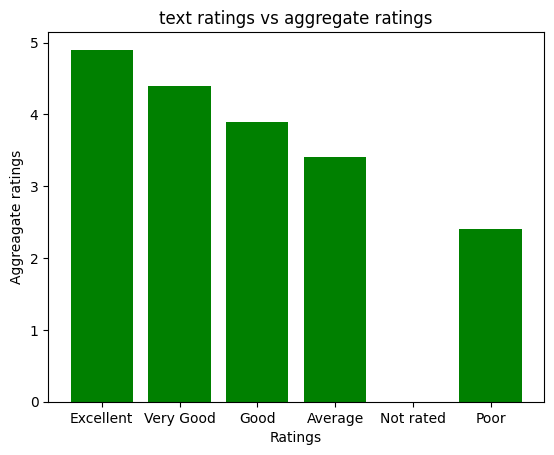

In [ ]:
x=data["Rating text"]
y=data["Aggregate rating"]
plt.bar(x,y,color="green")
plt.xlabel("Ratings")
plt.ylabel("Aggreagate ratings")
plt.title("text ratings vs aggregate ratings")
plt.show()

As we can see, the length of the reviews doesn't matter, because the ratings are provided according to the quality of services i.e good , neutral or bad, even if the length is larger or shorter, it does not make any difference.We found that Excellent is the positive rating, length 9 and also the Not rated and average have same lengths.

-------------------------------------------------------------------------------


# **Level 3 Task 2**
Task: Votes Analysis


Identify the restaurants with the highest and
lowest number of votes.


In [ ]:
data[["Restaurant Name","Votes"]].sort_values("Votes",ascending=False).head(3)

,Restaurant Name,Votes
728,Toit,10934
735,Truffles,9667
3994,Hauz Khas Social,7931


In [ ]:
data[["Restaurant Name","Votes"]].sort_values("Votes",ascending=True).head(3)

,Restaurant Name,Votes
5799,Khalsa Eating Point,0
7411,Radha Swami Chaat Bhandar,0
7414,Ram Ram Ji Kachori Bhandar,0


In [ ]:
highest=data.loc[728,["Restaurant Name","Votes"]]
lowest=data.loc[5799,["Restaurant Name","Votes"]]
print("Highest votes:",highest)
print("Lowest votes:",lowest)

Highest votes: Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object
Lowest votes: Restaurant Name    Khalsa Eating Point
Votes                                0
Name: 5799, dtype: object


Analyze if there is a correlation between the
number of votes and the rating of a
restaurant

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-105-52de06fbc795>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm')


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,sentiments,rate_length
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023,-0.048904,0.266582
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530,0.360383,0.062912
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101,-0.224656,-0.058147
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962,-0.083505,-0.103109
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783,0.058126,0.023377
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444,0.449547,-0.134901
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691,0.625038,-0.478885
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000,0.381132,0.014441
sentiments,-0.048904,0.360383,-0.224656,-0.083505,0.058126,0.449547,0.625038,0.381132,1.000000,-0.412400
rate_length,0.266582,0.062912,-0.058147,-0.103109,0.023377,-0.134901,-0.478885,0.014441,-0.412400,1.000000


The correlation coefficient of 0.313691 between "votes" and "rating" suggests a moderate positive correlation in the dataset. This implies that, on average, there is a tendency for higher-rated items to receive more votes. However, it's important to note that correlation does not imply causation, and other factors may contribute to this observed relationship.

END